<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#loading-librarys-and-data" data-toc-modified-id="loading-librarys-and-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>loading librarys and data</a></span></li><li><span><a href="#Checking-For-Stationarity" data-toc-modified-id="Checking-For-Stationarity-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Checking For Stationarity</a></span></li><li><span><a href="#Figuring-Order-for-ARIMA-Model" data-toc-modified-id="Figuring-Order-for-ARIMA-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Figuring Order for ARIMA Model</a></span></li><li><span><a href="#Split-Data-into-Training-and-Testing" data-toc-modified-id="Split-Data-into-Training-and-Testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Split Data into Training and Testing</a></span></li><li><span><a href="#Training-ARIMA-Model" data-toc-modified-id="Training-ARIMA-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Training ARIMA Model</a></span></li><li><span><a href="#Predictions-on-Test-Set" data-toc-modified-id="Predictions-on-Test-Set-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Predictions on Test Set</a></span></li></ul></div>

# loading librarys and data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Datafiles/DailyTemps.csv', index_col='DATE', parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


<AxesSubplot: xlabel='DATE'>

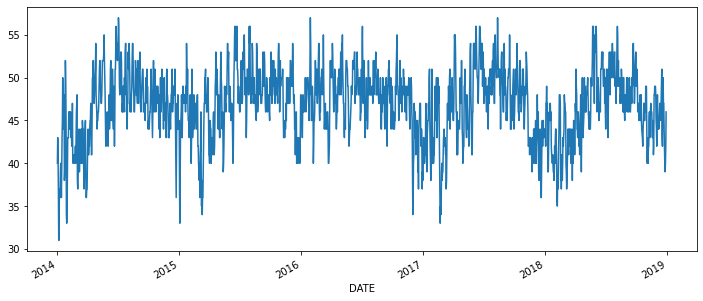

In [3]:
df['AvgTemp'].plot(figsize=(12,5))

# Checking For Stationarity

In [4]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

In [5]:
adf_test(df['AvgTemp'])

1. ADF :  -6.554680125068785
2. P-Value :  8.675937480199322e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


# Figuring Order for ARIMA Model

In [6]:
# Auto Arima Function used to select order of Auto Regression Model
from pmdarima import auto_arima
# Ignore harmless warnings
#import warnings
#warnings.filterwarnings("ignore")

In [7]:
stepwise_fit = auto_arima(df['AvgTemp'],trace=True)           
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.610, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=0.84 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=0.81 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.221, Time=1.22 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.212, Time=1.21 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.189, Time=1.11 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.657, Time=1.44 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.297, Time=1.51 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.202, Time=1.77 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.485, Time=1.61 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.664
Date:                Mon, 27 Feb 2023   AIC                           8295.328
Time:                        22:51:32   BIC                           8339.385
Sample:                             0   HQIC                          8311.581
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2874      0.387      3.328      0.001       0.529       2.046
ar.L1          0.9725      0.008    117.127      0.000       0.956       0.989
ma.L1         -0.1153      0.024     -4.821      0.000      -0.162      -0.068
ma.L2         -0.2143      0.024     -8.830      0.000      -0.262      -0.167
ma.L3         -0.2039      0.024     -8.506      0.000      -0.251      -0.157
ma.L4         -0.1403      0.023     -6.155      0.000      -0.185      -0.096
ma.L5         -0.0536      0.024     -2.193      0.028      -0.101      -0.006
sigma2         5.5087      0.173     31.879      0.000       5.170       5.847
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                20.96
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

here order of ARIMA model should be p=1, D=0, Q=5

# Split Data into Training and Testing

In [9]:
df.index = pd.DatetimeIndex(df.index).to_period('D')

In [10]:
df.index

PeriodIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
             '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
             '2014-01-09', '2014-01-10',
             ...
             '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
             '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
             '2018-12-29', '2018-12-30'],
            dtype='period[D]', name='DATE', length=1821)

In [11]:
print(df.shape)
train = df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape,test.shape)

(1821, 5)
(1791, 5) (30, 5)


In [12]:
test.iloc[0]

MinTemp      36.0
MaxTemp      52.0
AvgTemp      44.0
Sunrise     640.0
Sunset     1743.0
Name: 2018-12-01, dtype: float64

In [13]:
test.iloc[-1]

MinTemp      39.0
MaxTemp      52.0
AvgTemp      46.0
Sunrise     656.0
Sunset     1754.0
Name: 2018-12-30, dtype: float64

# Training ARIMA Model

In [48]:
train.index = pd.DatetimeIndex(train.index).to_period('D')

In [14]:
train.index

PeriodIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
             '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
             '2014-01-09', '2014-01-10',
             ...
             '2018-11-21', '2018-11-22', '2018-11-23', '2018-11-24',
             '2018-11-25', '2018-11-26', '2018-11-27', '2018-11-28',
             '2018-11-29', '2018-11-30'],
            dtype='period[D]', name='DATE', length=1791)

In [15]:
#from statsmodels.tsa.arima_model import ARIMA
#import statsmodels.tsa.arima.model.ARIMA as arima
from statsmodels.tsa.arima.model import ARIMA
#model = ARIMA(dataFrame.columnName, order=(1,0,0))

model = ARIMA(train['AvgTemp'], order=(1,0,5))
model = model.fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Mon, 27 Feb 2023   AIC                           8156.395
Time:                        22:52:06   BIC                           8200.320
Sample:                    01-01-2014   HQIC                          8172.614
                         - 11-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Predictions on Test Set

In [17]:
y_pred = model.get_forecast(len(test.index))

In [20]:
y_pred

In [18]:
y_pred_df = y_pred.conf_int(alpha = 0.05) 

In [19]:
y_pred_df

,lower AvgTemp,upper AvgTemp
2018-11-27,40.153692,49.354525
2018-11-28,38.966791,51.008798
2018-11-29,38.754787,52.022694
2018-11-30,38.861226,52.581864
2018-12-01,38.924678,52.802787
2018-12-02,38.894246,52.854006
2018-12-03,38.865059,52.903681
2018-12-04,38.837062,52.951870
2018-12-05,38.810205,52.998629
2018-12-06,38.784439,53.044010


In [ ]:
y_pred_df["Predictions"] = model.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y

In [ ]:
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])



In [ ]:
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()

In [52]:
test.index = pd.DatetimeIndex(test.index).to_period('D')

In [16]:
test.index

DatetimeIndex(['2018-12-01', '2018-12-02', '2018-12-03', '2018-12-04',
               '2018-12-05', '2018-12-06', '2018-12-07', '2018-12-08',
               '2018-12-09', '2018-12-10', '2018-12-11', '2018-12-12',
               '2018-12-13', '2018-12-14', '2018-12-15', '2018-12-16',
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='DATE', freq=None)

In [61]:
train.index

PeriodIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
             '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
             '2014-01-09', '2014-01-10',
             ...
             '2018-11-21', '2018-11-22', '2018-11-23', '2018-11-24',
             '2018-11-25', '2018-11-26', '2018-11-27', '2018-11-28',
             '2018-11-29', '2018-11-30'],
            dtype='period[D]', name='DATE', length=1791)

In [101]:
test.index[0]

Period('2018-12-01', 'D')

In [102]:
#pred1 = model.predict(start='2014-01-01', end='2014-01-30').rename('ARIMA1 predictions')
pred1 = model.predict(start=test.index[0]).rename('ARIMA1 predictions')
print(pred1)

2018-12-01    45.863733
Freq: D, Name: ARIMA1 predictions, dtype: float64


In [103]:
pred1 = model.predict(start=test.index[1]).rename('ARIMA1 predictions')
print(pred1)

2018-12-02    45.874126
Freq: D, Name: ARIMA1 predictions, dtype: float64


In [106]:
pred1 = model.predict(start=test.index[15]).rename('ARIMA1 predictions')
print(pred1)

2018-12-16    46.004861
Freq: D, Name: ARIMA1 predictions, dtype: float64


<AxesSubplot: xlabel='DATE'>

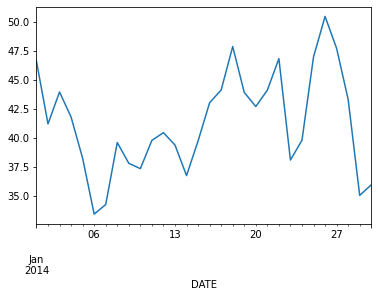

In [87]:
pred1.plot()

In [76]:
model

In [17]:
train.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2018-11-21', '2018-11-22', '2018-11-23', '2018-11-24',
               '2018-11-25', '2018-11-26', '2018-11-27', '2018-11-28',
               '2018-11-29', '2018-11-30'],
              dtype='datetime64[ns]', name='DATE', length=1791, freq=None)

In [88]:
test.index

PeriodIndex(['2018-12-01', '2018-12-02', '2018-12-03', '2018-12-04',
             '2018-12-05', '2018-12-06', '2018-12-07', '2018-12-08',
             '2018-12-09', '2018-12-10', '2018-12-11', '2018-12-12',
             '2018-12-13', '2018-12-14', '2018-12-15', '2018-12-16',
             '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
             '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
             '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
             '2018-12-29', '2018-12-30'],
            dtype='period[D]', name='DATE')

In [22]:
start = len(train)
end = len(train)+len(test) - 1
pred = model.predict(start=start, end=end).rename('ARIMA predictions')
print(pred)

1791    44.754109
1792    44.987795
1793    45.388741
1794    45.721545
1795    45.863733
1796    45.874126
1797    45.884370
1798    45.894466
1799    45.904417
1800    45.914225
1801    45.923891
1802    45.933418
1803    45.942808
1804    45.952063
1805    45.961185
1806    45.970175
1807    45.979036
1808    45.987769
1809    45.996377
1810    46.004861
1811    46.013222
1812    46.021463
1813    46.029586
1814    46.037591
1815    46.045481
1816    46.053258
1817    46.060923
1818    46.068477
1819    46.075922
1820    46.083261
Name: ARIMA predictions, dtype: float64


C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
p = ARIMA.predict(

In [78]:
start = len(train['AvgTemp'])
start

1791

In [83]:
start = test['AvgTemp'].index[0]
end = test['AvgTemp'].index[0]

In [82]:
test['AvgTemp'].index[-1]

Period('2018-12-30', 'D')

In [89]:
#start = len(train['AvgTemp'])
#end = len(train['AvgTemp'])+len(test['AvgTemp']) - 1
pred = model.predict(start='2018-12-01', end='2018-12-30',typ='levels').rename('ARIMA predictions')
print(pred)

2018-12-01    45.863733
2018-12-02    45.874126
2018-12-03    45.884370
2018-12-04    45.894466
2018-12-05    45.904417
2018-12-06    45.914225
2018-12-07    45.923891
2018-12-08    45.933418
2018-12-09    45.942808
2018-12-10    45.952063
2018-12-11    45.961185
2018-12-12    45.970175
2018-12-13    45.979036
2018-12-14    45.987769
2018-12-15    45.996377
2018-12-16    46.004861
2018-12-17    46.013222
2018-12-18    46.021463
2018-12-19    46.029586
2018-12-20    46.037591
2018-12-21    46.045481
2018-12-22    46.053258
2018-12-23    46.060923
2018-12-24    46.068477
2018-12-25    46.075922
2018-12-26    46.083261
2018-12-27    46.090493
2018-12-28    46.097622
2018-12-29    46.104648
2018-12-30    46.111573
Freq: D, Name: ARIMA predictions, dtype: float64


In [85]:
pred

2018-12-01    45.863733
Freq: D, Name: ARIMA predictions, dtype: float64

In [31]:
pred.index = test.index
pred

DATE
2018-12-01    44.754109
2018-12-02    44.987795
2018-12-03    45.388741
2018-12-04    45.721545
2018-12-05    45.863733
2018-12-06    45.874126
2018-12-07    45.884370
2018-12-08    45.894466
2018-12-09    45.904417
2018-12-10    45.914225
2018-12-11    45.923891
2018-12-12    45.933418
2018-12-13    45.942808
2018-12-14    45.952063
2018-12-15    45.961185
2018-12-16    45.970175
2018-12-17    45.979036
2018-12-18    45.987769
2018-12-19    45.996377
2018-12-20    46.004861
2018-12-21    46.013222
2018-12-22    46.021463
2018-12-23    46.029586
2018-12-24    46.037591
2018-12-25    46.045481
2018-12-26    46.053258
2018-12-27    46.060923
2018-12-28    46.068477
2018-12-29    46.075922
2018-12-30    46.083261
Name: ARIMA predictions, dtype: float64

In [37]:
type(pred)

pandas.core.series.Series

In [38]:
type(test['AvgTemp'])

pandas.core.series.Series

In [45]:
test['AvgTemp']

DATE
2018-12-01    44.0
2018-12-02    42.0
2018-12-03    45.0
2018-12-04    48.0
2018-12-05    45.0
2018-12-06    44.0
2018-12-07    45.0
2018-12-08    44.0
2018-12-09    45.0
2018-12-10    46.0
2018-12-11    47.0
2018-12-12    47.0
2018-12-13    45.0
2018-12-14    46.0
2018-12-15    47.0
2018-12-16    49.0
2018-12-17    51.0
2018-12-18    43.0
2018-12-19    42.0
2018-12-20    48.0
2018-12-21    50.0
2018-12-22    47.0
2018-12-23    47.0
2018-12-24    44.0
2018-12-25    42.0
2018-12-26    40.0
2018-12-27    39.0
2018-12-28    40.0
2018-12-29    42.0
2018-12-30    46.0
Name: AvgTemp, dtype: float64

In [39]:
test['AvgTemp'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 30 entries, 2018-12-01 to 2018-12-30
Series name: AvgTemp
Non-Null Count  Dtype  
--------------  -----  
30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


In [40]:
pred.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 30 entries, 2018-12-01 to 2018-12-30
Series name: ARIMA predictions
Non-Null Count  Dtype  
--------------  -----  
30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


<AxesSubplot: xlabel='DATE'>

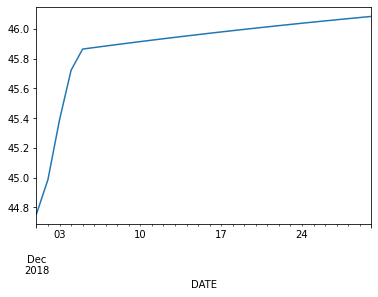

In [44]:
pred.plot()

<AxesSubplot: xlabel='DATE'>

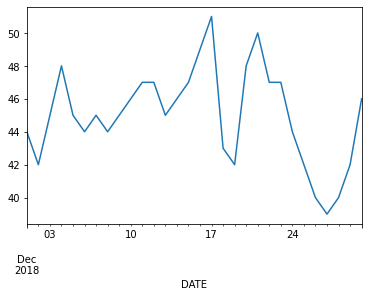

In [19]:
test['AvgTemp'].plot()

In [33]:
pred.shape

(30,)

In [34]:
test['AvgTemp'].shape

(30,)

In [35]:
test['AvgTemp']

DATE
2018-12-01    44.0
2018-12-02    42.0
2018-12-03    45.0
2018-12-04    48.0
2018-12-05    45.0
2018-12-06    44.0
2018-12-07    45.0
2018-12-08    44.0
2018-12-09    45.0
2018-12-10    46.0
2018-12-11    47.0
2018-12-12    47.0
2018-12-13    45.0
2018-12-14    46.0
2018-12-15    47.0
2018-12-16    49.0
2018-12-17    51.0
2018-12-18    43.0
2018-12-19    42.0
2018-12-20    48.0
2018-12-21    50.0
2018-12-22    47.0
2018-12-23    47.0
2018-12-24    44.0
2018-12-25    42.0
2018-12-26    40.0
2018-12-27    39.0
2018-12-28    40.0
2018-12-29    42.0
2018-12-30    46.0
Name: AvgTemp, dtype: float64

In [30]:
len(pred)

30

In [29]:
test.index

DatetimeIndex(['2018-12-01', '2018-12-02', '2018-12-03', '2018-12-04',
               '2018-12-05', '2018-12-06', '2018-12-07', '2018-12-08',
               '2018-12-09', '2018-12-10', '2018-12-11', '2018-12-12',
               '2018-12-13', '2018-12-14', '2018-12-15', '2018-12-16',
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='DATE', freq=None)

In [114]:
pred

1791    44.754109
1792    44.987795
1793    45.388741
1794    45.721545
1795    45.863733
1796    45.874126
1797    45.884370
1798    45.894466
1799    45.904417
1800    45.914225
1801    45.923891
1802    45.933418
1803    45.942808
1804    45.952063
1805    45.961185
1806    45.970175
1807    45.979036
1808    45.987769
1809    45.996377
1810    46.004861
1811    46.013222
1812    46.021463
1813    46.029586
1814    46.037591
1815    46.045481
1816    46.053258
1817    46.060923
1818    46.068477
1819    46.075922
1820    46.083261
Name: ARIMA predictions, dtype: float64

<AxesSubplot: xlabel='DATE'>

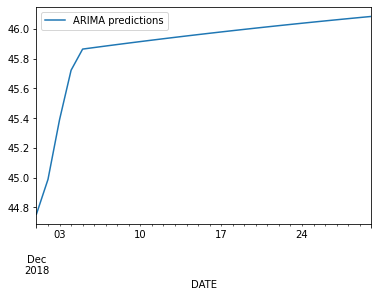

In [32]:
#index_future_dates = pd.date_range(start='2018-12-01', end='2018-12-30')
#pred.index = index_future_dates
pred.plot(legend=True)


In [97]:
start = len(train)
start

1791

In [95]:
train.shape[0]

1791

In [94]:
train.shape[0]+test.shape[0]-1

1820

In [90]:
index_future_dates = pd.date_range(start='2018-12-01', end='2018-12-30')
index_future_dates

DatetimeIndex(['2018-12-01', '2018-12-02', '2018-12-03', '2018-12-04',
               '2018-12-05', '2018-12-06', '2018-12-07', '2018-12-08',
               '2018-12-09', '2018-12-10', '2018-12-11', '2018-12-12',
               '2018-12-13', '2018-12-14', '2018-12-15', '2018-12-16',
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', freq='D')

In [95]:
start = index_future_dates[0]

Timestamp('2018-12-01 00:00:00', freq='D')

In [96]:
end = index_future_dates[-1]

Timestamp('2018-12-30 00:00:00', freq='D')

In [97]:
pred = model.predict(start=start, end=end).rename('ARIMA predictions')
print(pred)

2018-12-01    45.863733
Freq: D, Name: ARIMA predictions, dtype: float64


<AxesSubplot: xlabel='DATE'>

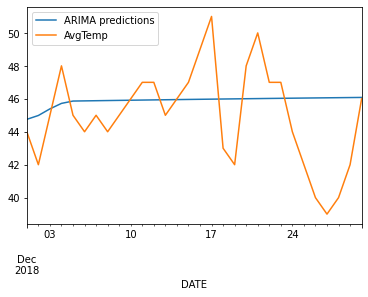

In [84]:
index_future_dates = pd.date_range(start='2018-12-01', end='2018-12-30')
pred.index=index_future_dates
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot: xlabel='DATE'>

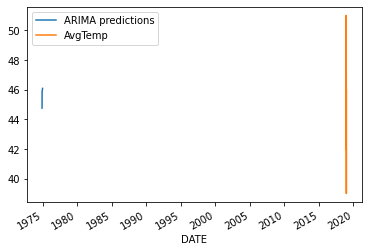

In [83]:
start = len(train)
end = len(train)+len(test) - 1
# if predicted values dont have date values as index, have to uncomment following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01', end='2018-12-30')
pred = model.predict(start=start, end=end, typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

<AxesSubplot: xlabel='DATE'>

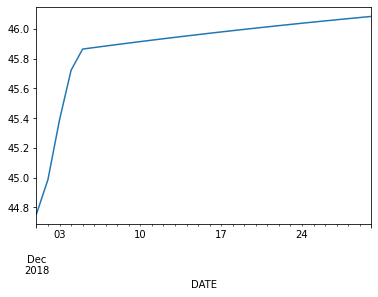

In [36]:
pred.plot()

In [ ]:
pred

In [117]:
pred

2018-12-01    44.754109
2018-12-02    44.987795
2018-12-03    45.388741
2018-12-04    45.721545
2018-12-05    45.863733
2018-12-06    45.874126
2018-12-07    45.884370
2018-12-08    45.894466
2018-12-09    45.904417
2018-12-10    45.914225
2018-12-11    45.923891
2018-12-12    45.933418
2018-12-13    45.942808
2018-12-14    45.952063
2018-12-15    45.961185
2018-12-16    45.970175
2018-12-17    45.979036
2018-12-18    45.987769
2018-12-19    45.996377
2018-12-20    46.004861
2018-12-21    46.013222
2018-12-22    46.021463
2018-12-23    46.029586
2018-12-24    46.037591
2018-12-25    46.045481
2018-12-26    46.053258
2018-12-27    46.060923
2018-12-28    46.068477
2018-12-29    46.075922
2018-12-30    46.083261
Freq: D, Name: ARIMA predictions, dtype: float64

In [119]:
test['AvgTemp']

DATE
2018-12-01    44.0
2018-12-02    42.0
2018-12-03    45.0
2018-12-04    48.0
2018-12-05    45.0
2018-12-06    44.0
2018-12-07    45.0
2018-12-08    44.0
2018-12-09    45.0
2018-12-10    46.0
2018-12-11    47.0
2018-12-12    47.0
2018-12-13    45.0
2018-12-14    46.0
2018-12-15    47.0
2018-12-16    49.0
2018-12-17    51.0
2018-12-18    43.0
2018-12-19    42.0
2018-12-20    48.0
2018-12-21    50.0
2018-12-22    47.0
2018-12-23    47.0
2018-12-24    44.0
2018-12-25    42.0
2018-12-26    40.0
2018-12-27    39.0
2018-12-28    40.0
2018-12-29    42.0
2018-12-30    46.0
Freq: D, Name: AvgTemp, dtype: float64

In [121]:
type(test['AvgTemp'])

pandas.core.series.Series

<AxesSubplot: xlabel='DATE'>

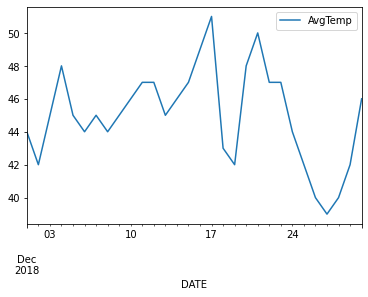

In [16]:
test['AvgTemp'].plot(legend=True)

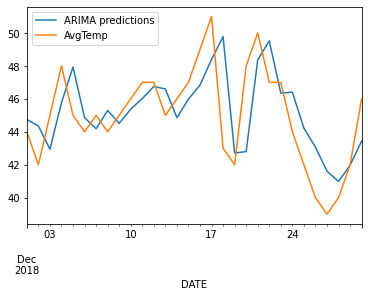

In [14]:
pred.plot(legend='ARIMA Predictions')
test['AvgTemp'].plot(legend=True)

In [15]:
test['AvgTemp'].mean()

45.0

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)


2.326343714317439


In [17]:
model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


#For Future Dates

In [18]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2018-12-30    46.418064
2018-12-31    46.113783
2019-01-01    45.617772
2019-01-02    45.249555
2019-01-03    45.116984
2019-01-04    45.136771
2019-01-05    45.156280
2019-01-06    45.175516
2019-01-07    45.194482
2019-01-08    45.213183
2019-01-09    45.231622
2019-01-10    45.249802
2019-01-11    45.267728
2019-01-12    45.285403
2019-01-13    45.302830
2019-01-14    45.320012
2019-01-15    45.336955
2019-01-16    45.353659
2019-01-17    45.370130
2019-01-18    45.386370
2019-01-19    45.402383
2019-01-20    45.418171
2019-01-21    45.433738
2019-01-22    45.449087
2019-01-23    45.464221
2019-01-24    45.479143
2019-01-25    45.493855
2019-01-26    45.508362
2019-01-27    45.522665
2019-01-28    45.536769
2019-01-29    45.550674
Freq: D, Name: ARIMA Predictions, dtype: float64


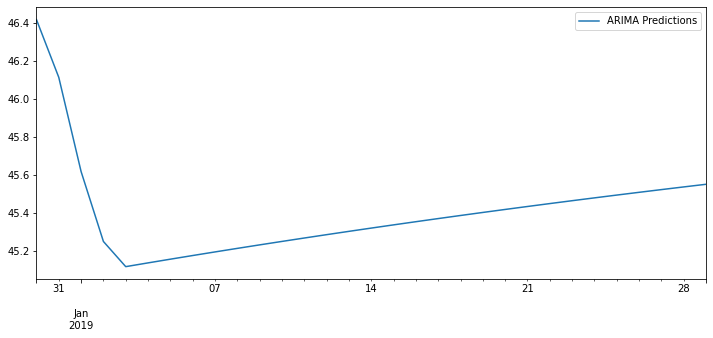

In [19]:
pred.plot(figsize=(12,5),legend=True)
